In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/yash/Downloads/wine_data.csv",header = None,usecols = [0,1,2])
df.columns = ["Class Label","Alcohol","Malic Acid"] # Add Column Name
df.sample(5)

,Class Label,Alcohol,Malic Acid
3,1,14.37,1.95
25,1,13.05,2.05
60,2,12.33,1.10
104,2,12.51,1.73
121,2,11.56,2.05


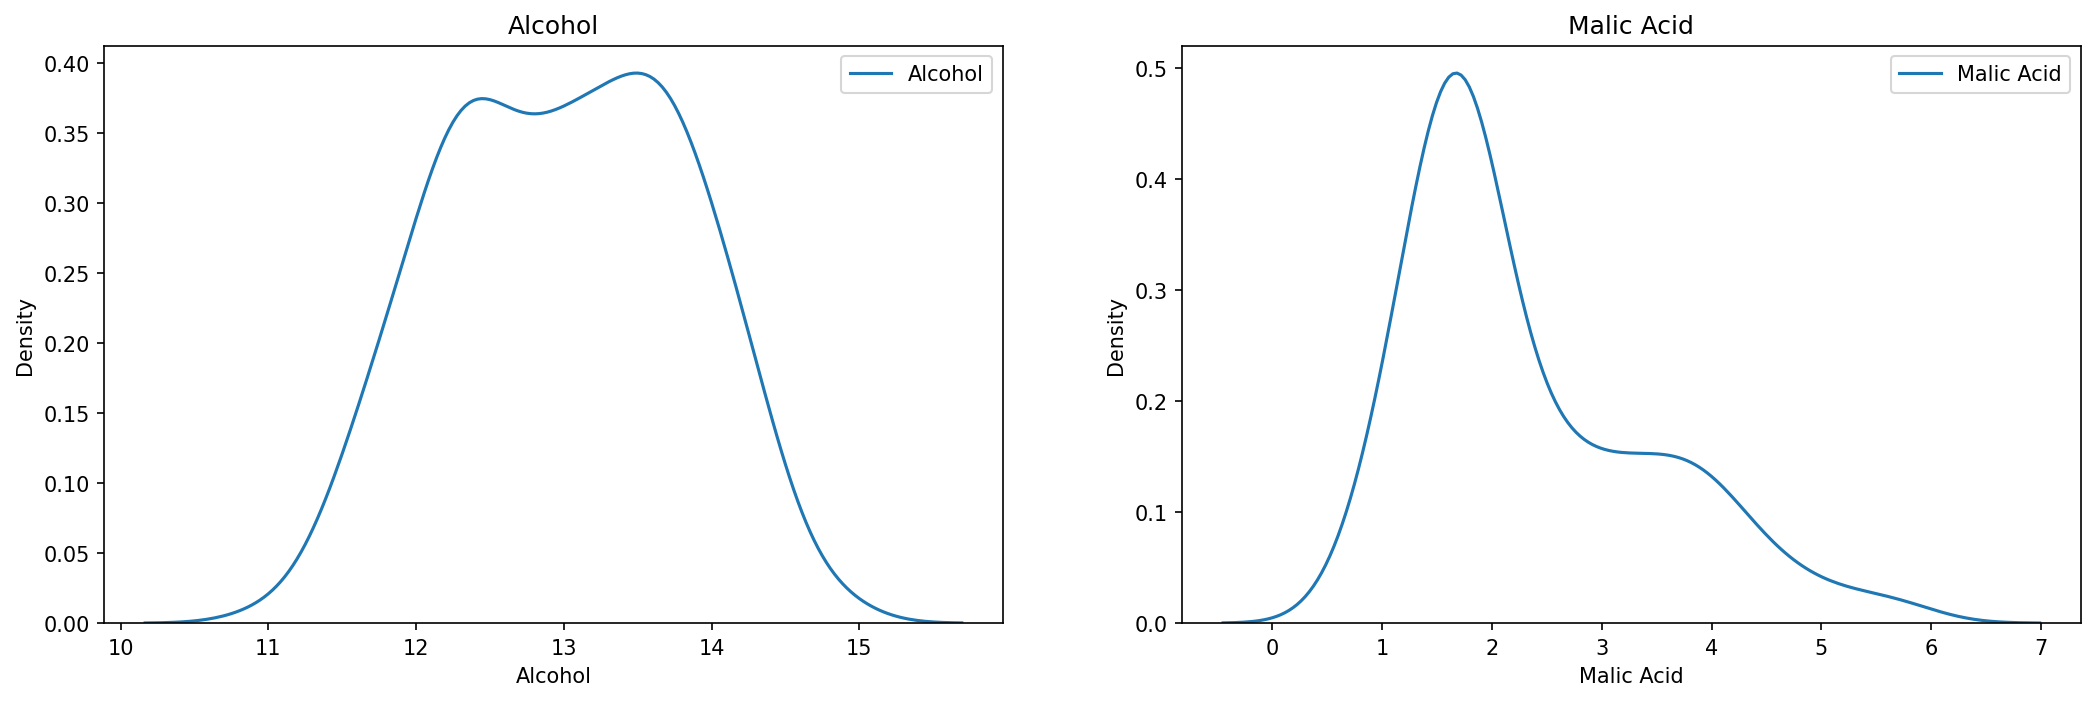

In [3]:
plt.figure(figsize = (17,5),dpi  = 150)

plt.subplot(1,2,1)
sns.kdeplot(df["Alcohol"],label = "Alcohol")
plt.title("Alcohol")
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(df["Malic Acid"],label = "Malic Acid")
plt.title("Malic Acid")
plt.legend()


<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

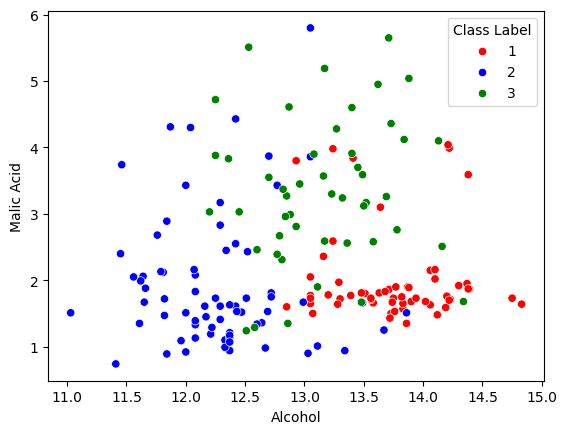

In [4]:
color_dict = {1:"Red",2:"Blue",3:"Green"}
sns.scatterplot(x = df["Alcohol"],y = df["Malic Acid"],hue = df["Class Label"],palette = color_dict)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop("Class Label",axis = 1),df["Class Label"],test_size = 0.15,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((151, 2), (27, 2), (151,), (27,))

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# We can also do that which is given bellow 
#
# x_train_scaled = scaler.fit_transform(x_train)
# instead of =>
# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)

In [7]:
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

In [8]:
np.round(x_train.describe(),1),np.round(x_train_scaled.describe(),1)
# Here 1 show how many decimal places after "."(point) 

(       Alcohol  Malic Acid
 count    151.0       151.0
 mean      13.0         2.4
 std        0.8         1.1
 min       11.0         0.7
 25%       12.3         1.6
 50%       13.0         1.9
 75%       13.7         3.2
 max       14.8         5.6,
            0      1
 count  151.0  151.0
 mean     0.5    0.3
 std      0.2    0.2
 min      0.0    0.0
 25%      0.3    0.2
 50%      0.5    0.2
 75%      0.7    0.5
 max      1.0    1.0)

Text(0.5, 1.0, 'After Normalization')

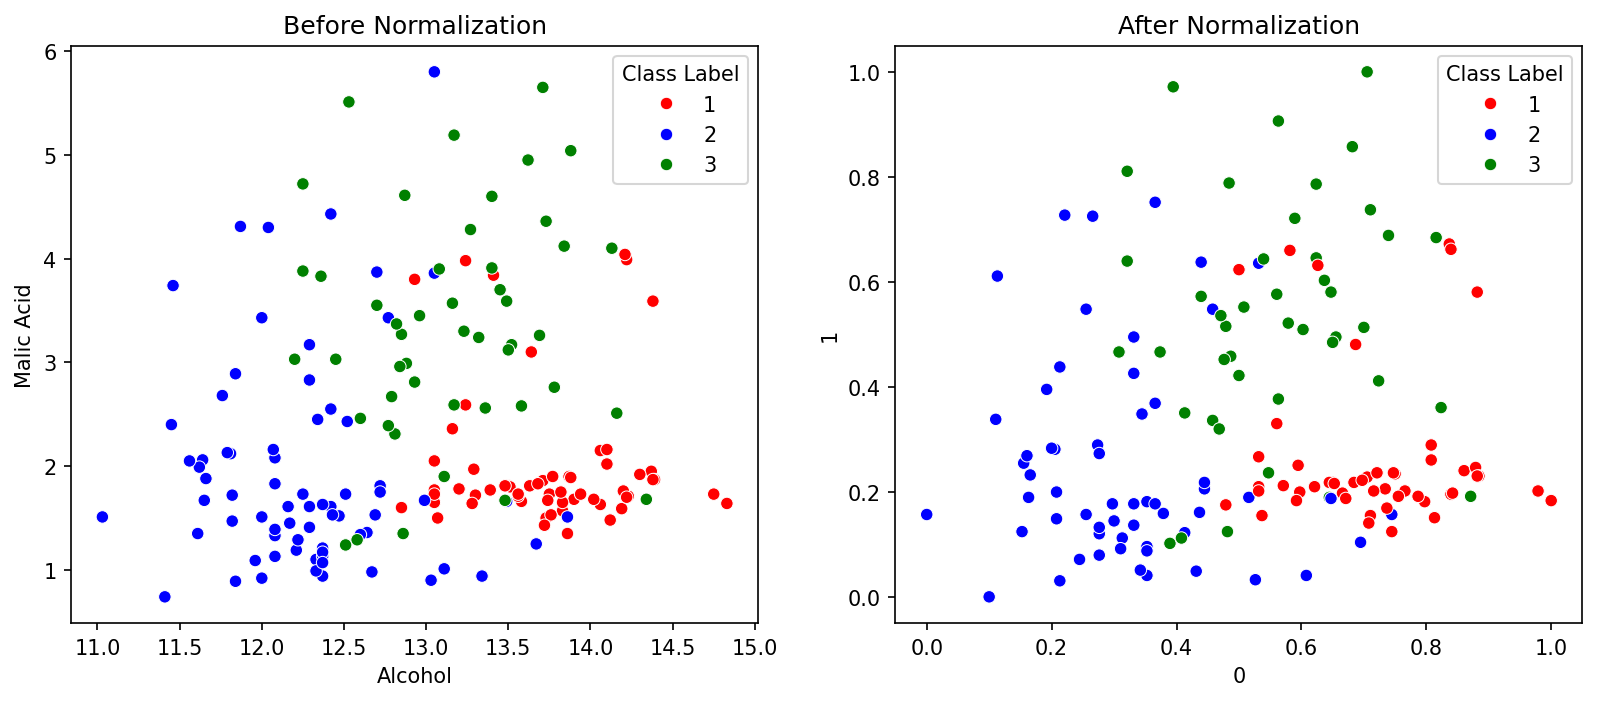

In [9]:
y_train_int = y_train.reset_index(drop=True)

color_dict = {1:"Red",2:"Blue",3:"Green"}
plt.figure(figsize = (13,5),dpi  = 150)

plt.subplot(1,2,1)
sns.scatterplot(x = df["Alcohol"],y = df["Malic Acid"],hue = df["Class Label"],palette = color_dict)
plt.title("Before Normalization")

plt.subplot(1,2,2)
sns.scatterplot(x = x_train_scaled[0],y = x_train_scaled[1],hue = y_train_int,palette = color_dict)
plt.title("After Normalization")

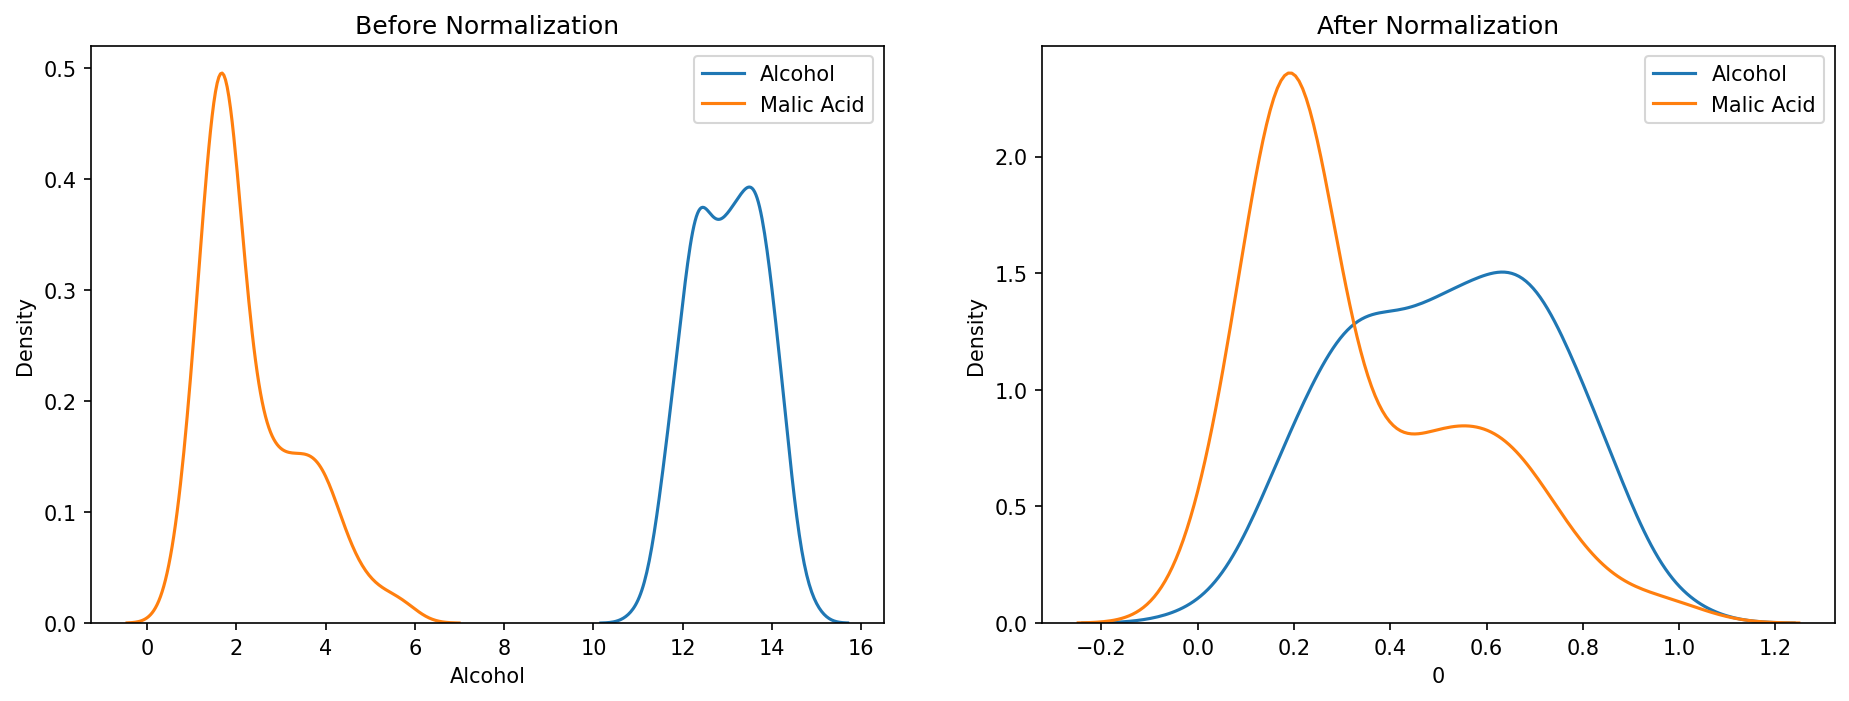

In [10]:
plt.figure(figsize = (15,5),dpi  = 150)

plt.subplot(1,2,1)
sns.kdeplot(df["Alcohol"],label = "Alcohol")
sns.kdeplot(df["Malic Acid"],label = "Malic Acid")
plt.title("Before Normalization")
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled[0],label = "Alcohol")
sns.kdeplot(x_train_scaled[1],label = "Malic Acid")
plt.title("After Normalization")
plt.legend()


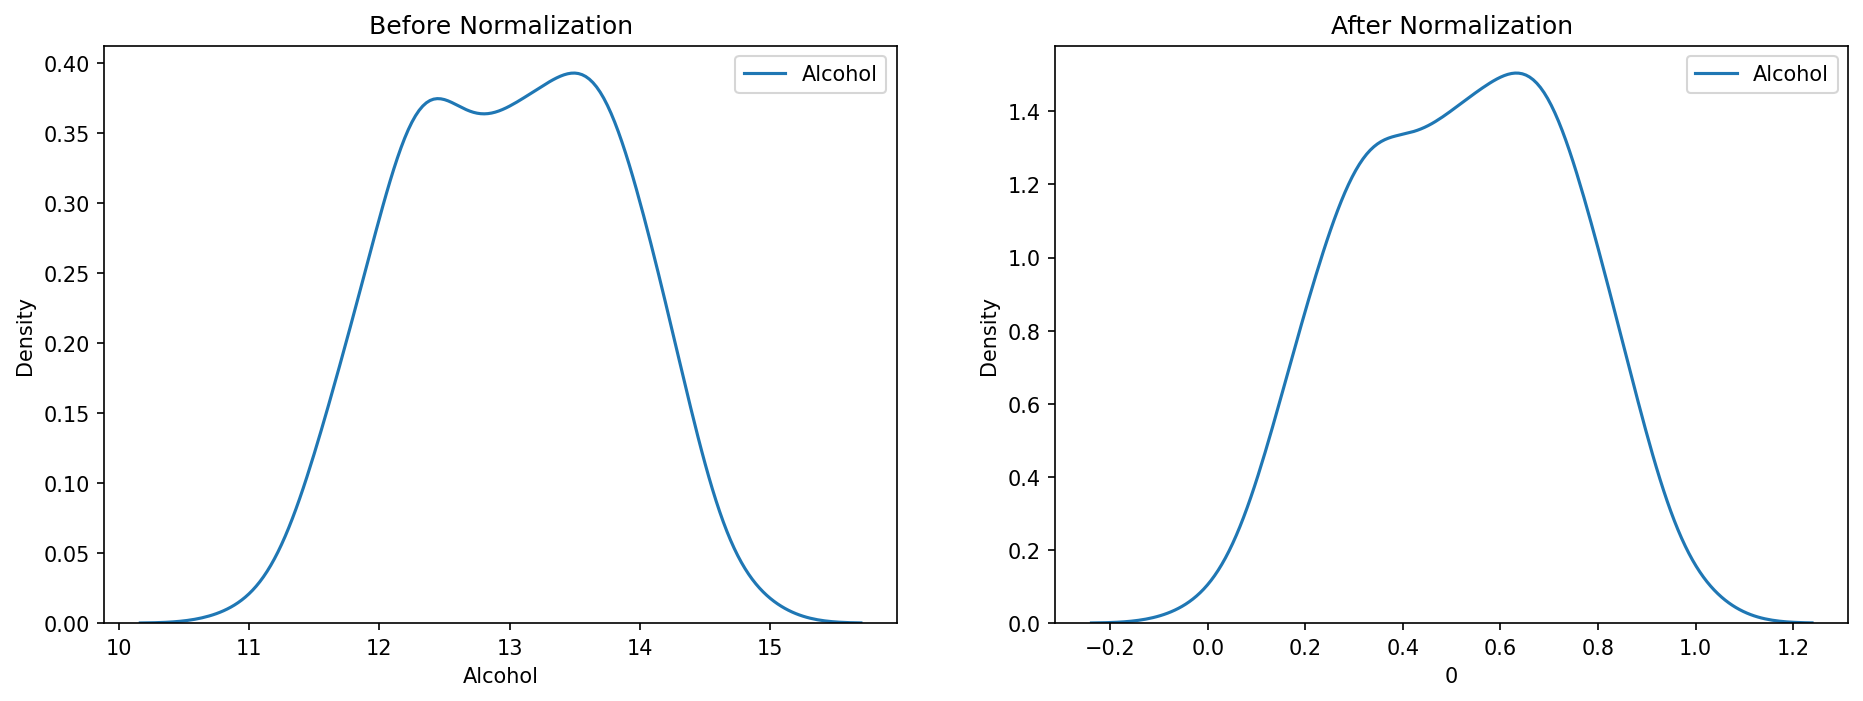

In [11]:
plt.figure(figsize = (15,5),dpi  = 150)

plt.subplot(1,2,1)
sns.kdeplot(df["Alcohol"],label = "Alcohol")
plt.title("Before Normalization")
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled[0],label = "Alcohol")
plt.title("After Normalization")
plt.legend()

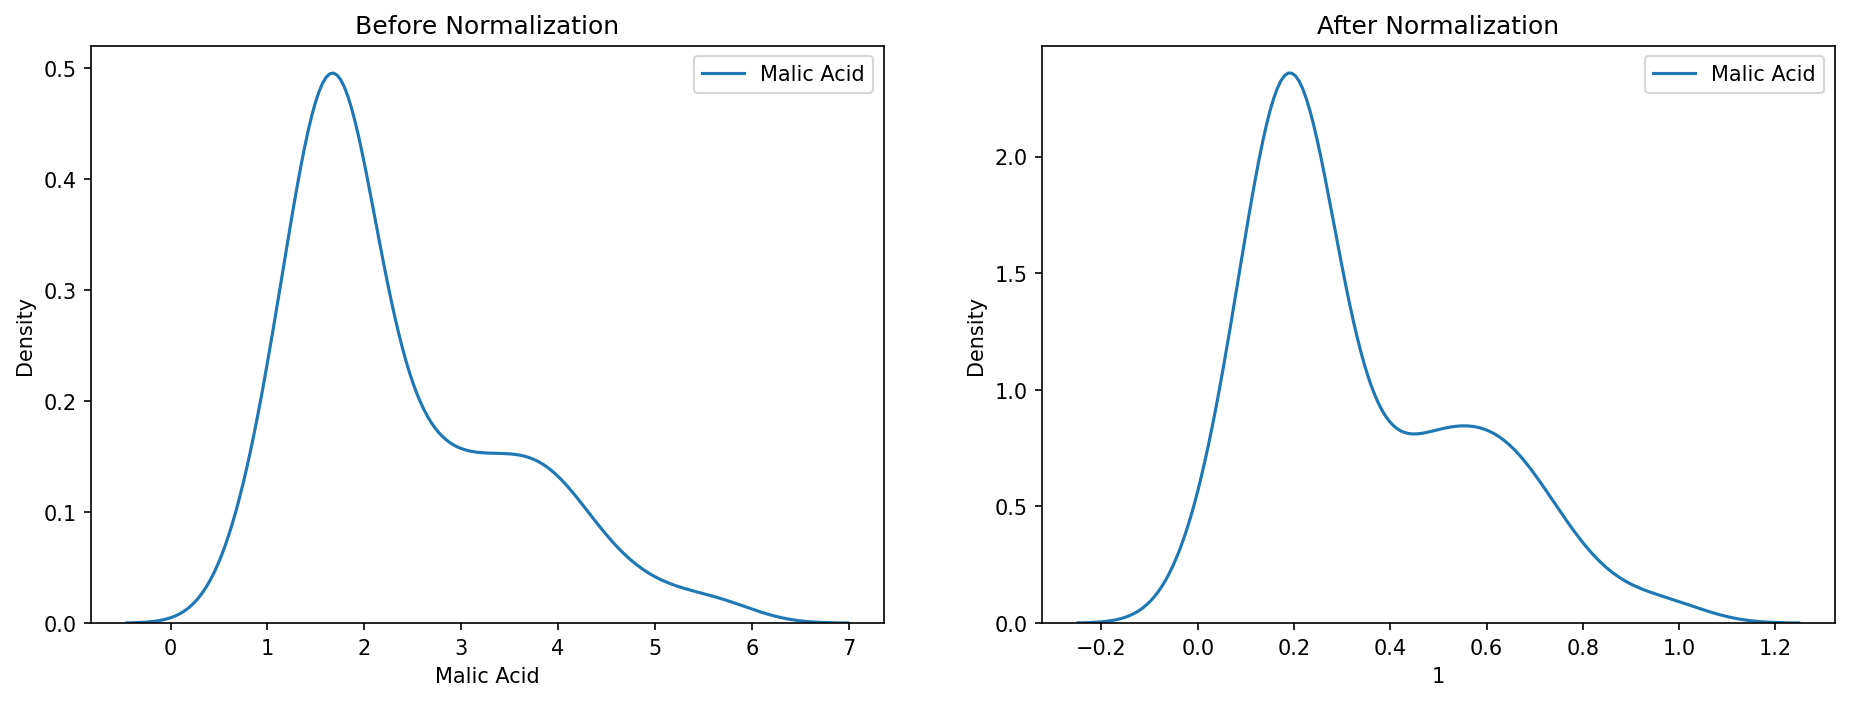

In [12]:
plt.figure(figsize = (15,5),dpi  = 150)

plt.subplot(1,2,1)
sns.kdeplot(df["Malic Acid"],label = "Malic Acid")
plt.title("Before Normalization")
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled[1],label = "Malic Acid")
plt.title("After Normalization")
plt.legend()